## Independent Data Exploration: U.S.-Mexican Border 

In [35]:
from datascience import * # a UC Berkeley developed wrapper of Pandas library for beginning students in Data Science
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#from client.api.notebook import Notebook
#ok = Notebook('exploration.ok')
#_ = ok.auth(inline=True)

## 1. Independent Data Exploration


#### 1) Data Summary
The three following data setes represent information available from U.S. Border Patrol and Security regarding the United States-Mexican border. The wall data set represents the lengths of wall built, the year theat they were built, type, and subtype. Our quantiative variable is manifest in the length of wall built (in feet) and our categorical data is manifest in the type and subtype of the wall sections. The other two data sets include the total number of apprehensions of illegal crossings at the the U.S-Mexican border by U.S. Border Patrol (table name = apprehensions) as well as the number of BP Staff within the different sectors of the U.S.-Mexican border (table name = staffing). The latter two tables contain only quantitative variables.

In [36]:
apprehensions = Table().read_table('Apprehensions.csv')
apprehensions

Fiscal Year,Big Bend,Del Rio,El Centro,El Paso,Laredo,Rio Grande Valley,San Diego,Tucson,Yuma,Southwest Border Total
2016,6366,23078,19448,25634,36562,186830,31891,64891,14170,408870
2015,5031,19013,12820,14495,35888,147257,26290,63397,7142,331333
2014,4096,24255,14511,12339,44049,256393,29911,87915,5902,479371
2013,3684,23510,16306,11154,50749,154453,27496,120939,6106,414397
2012,3964,21720,23916,9678,44872,97762,28461,120000,6500,356873
2011,4036,16144,30191,10345,36053,59243,42447,123285,5833,327577
2010,5288,14694,32562,12251,35287,59766,68565,212202,7116,447731
2009,6360,17082,33521,14999,40569,60989,118721,241673,6951,540865
2008,5391,20761,40961,30312,43658,75473,162390,317696,8363,705005
2007,5536,22920,55883,75464,56714,73430,152460,378239,37992,858638


In [37]:
wall = Table().read_table('the-wall.csv')
wall.sort('year')

wall_type,vbr_type,year,length_ft
Ped,Primary,1962,715.31
Ped,Primary,1970,24385.6
Ped,Primary,1970,55.45
Ped,Primary,1970,302.4
Ped,Primary,1990,78.13
Ped,Primary,1990,430.93
Ped,Primary,1991,1915.88
Ped,Primary,1991,1515.17
Ped,Primary,1991,4445.99
Ped,Primary,1991,2394.66


In [38]:
staffing = Table().read_table('Staffing.csv')
staffing = staffing.with_column("Year", np.arange(1992, 2017))
staffing.show()

Year,Big Bend (formerly Marfa),Del Rio,El Centro,El Paso,Laredo,Rio Grande Valley (formerly McAllen),San Diego,Tucson,Yuma,Total
1992,108,317,217,627,364,418,1009,300,195,3555
1993,134,297,198,608,353,393,992,287,182,3444
1994,128,299,194,643,337,392,1290,282,182,3747
1995,133,399,190,746,421,474,1433,407,185,4388
1996,134,406,189,841,415,507,1965,702,174,5333
1997,135,471,249,918,451,760,2281,875,175,6315
1998,164,589,383,972,628,1107,2274,1013,227,7357
1999,144,639,423,957,685,1166,2136,1328,228,7706
2000,196,758,502,1036,806,1368,2053,1548,313,8580
2001,194,893,589,1086,921,1451,2004,1686,323,9147


#### Visualization of some quantitative variable(s) of the data that summarizes the data effectively and short observational description.

In [39]:
walls_with_years = wall.where('year', are.not_equal_to('TBD'))
cleaned_wall = walls_with_years.with_column('year_0', walls_with_years.column('year').astype(np.int)).drop('year')
cleaned_wall_with_miles = cleaned_wall.with_column('miles', cleaned_wall.column('length_ft') / 5280)
cleaned_wall_with_miles

wall_type,vbr_type,length_ft,year_0,miles
Veh,Temporary,162.67,2004,0.0308087
Veh,Temporary,133.7,2006,0.025322
Veh,Temporary,232.08,2006,0.0439545
Veh,Temporary,26.99,2001,0.00511174
Veh,Temporary,21.73,2001,0.00411553
Veh,Permanent,35402.6,2006,6.70504
Veh,Permanent,682.69,2007,0.129297
Veh,Temporary,663.24,2007,0.125614
Veh,Permanent,1294.28,2007,0.245129
Veh,Permanent,2122.21,2007,0.401934


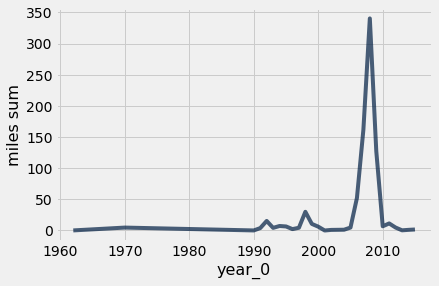

In [40]:
cleaned_wall_with_miles.group('year_0', sum).plot('year_0', 'miles sum')

This plot shows the length of walls built in each year in miles from 1960 to 2015. We can see that there was a large portion of the wall that was constructed from 2006 through 2010, during Bush's term and the first year of Barack Obama's term. There was also some wall construction in the 90's during President Bill Clinton's presidential term.

#### Visualization of categorical variable(s) of the data in a way that summarizes the data effectively and short observational description.

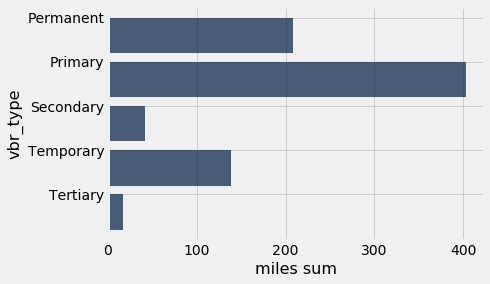

In [41]:
wall_type_bar = cleaned_wall_with_miles.group('vbr_type', sum).barh('vbr_type','miles sum')
wall_type_bar

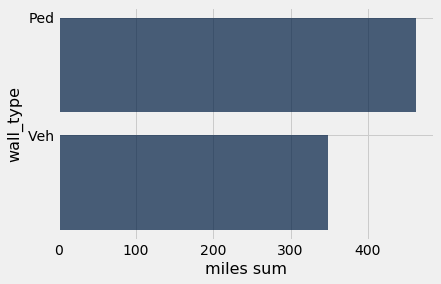

In [42]:
wall_type_bar = cleaned_wall_with_miles.group('wall_type', sum).barh('wall_type','miles sum')
wall_type_bar

The sections of the wall are divided first into pedestrian and vehicle categories. Pedestrian walls are further divided into the subtypes of primary, secondary, and tertiary. Primary walls are usually made of corrugated steel landing mats; secondary walls are typically composed of fencing and barbed wire; tertiary walls are made of high chain-link fencing. The latter of the last composes less than 15 miles of the entire wall.

The first graph shows the miles of each subtype of wall constructed. The second graph shows the amount of pedestrian and vehicle wall constructed. We can see that most of the wall is of primary pedestrian categorization. It should be noted that secondary and tertiary walls were built next to primary walls to reinforce security. Much of the length of America's wall comes from reinforcement of the primary wall's built (rather than extending the wall to areas with no walls at all).

#### Summarize some aspect of the data in a table that involves joining the two tables and write a short observational description.

In [43]:
staffing

Year,Big Bend (formerly Marfa),Del Rio,El Centro,El Paso,Laredo,Rio Grande Valley (formerly McAllen),San Diego,Tucson,Yuma,Total
1992,108,317,217,627,364,418,1009,300,195,3555
1993,134,297,198,608,353,393,992,287,182,3444
1994,128,299,194,643,337,392,1290,282,182,3747
1995,133,399,190,746,421,474,1433,407,185,4388
1996,134,406,189,841,415,507,1965,702,174,5333
1997,135,471,249,918,451,760,2281,875,175,6315
1998,164,589,383,972,628,1107,2274,1013,227,7357
1999,144,639,423,957,685,1166,2136,1328,228,7706
2000,196,758,502,1036,806,1368,2053,1548,313,8580
2001,194,893,589,1086,921,1451,2004,1686,323,9147


In [44]:
apprehensions_and_wall = cleaned_wall_with_miles.group('year_0', sum).join(
    'year_0', apprehensions, 'Fiscal Year').select([0, 1, 2, 3, 4, 14]).relabeled(
    'Southwest Border Total', 'Apprehensions Total')

apprehensions_and_wall_and_staffing = apprehensions_and_wall.join(
    'year_0', staffing, 'Year').select([0, 3, 4, 5, 15]).relabeled('Total', 'Staffing')

apprehensions_and_wall_and_staffing.show()

year_0,length_ft sum,miles sum,Apprehensions Total,Staffing
1992,80960.4,15.3334,1145574,3555
1993,22341.5,4.23135,1212886,3444
1994,38139.2,7.22334,979101,3747
1995,34300.4,6.49629,1271390,4388
1996,11721.2,2.21993,1507020,5333
1997,23289.6,4.4109,1368707,6315
1998,158366,29.9935,1516680,7357
1999,56037.9,10.6132,1537000,7706
2000,32446.6,6.14519,1643679,8580
2001,48.72,0.00922727,1235718,9147


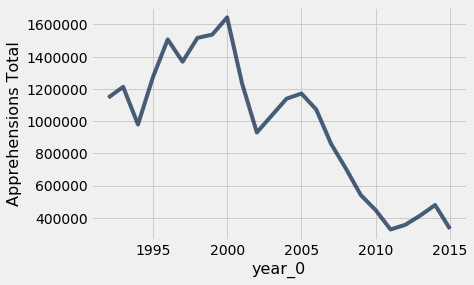

In [45]:
apprehensions_and_wall_and_staffing.plot("year_0", "Apprehensions Total")

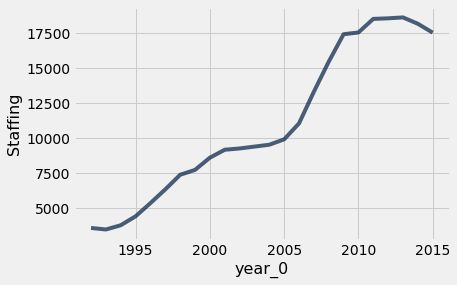

In [46]:
apprehensions_and_wall_and_staffing.plot('year_0', 'Staffing')

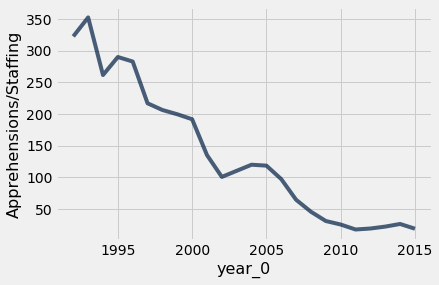

In [47]:
apprehensions_and_wall_and_staffing.with_column('Apprehensions/Staffing', apprehensions_and_wall_and_staffing.column('Apprehensions Total')/apprehensions_and_wall_and_staffing.column('Staffing')).plot('year_0', 'Apprehensions/Staffing')

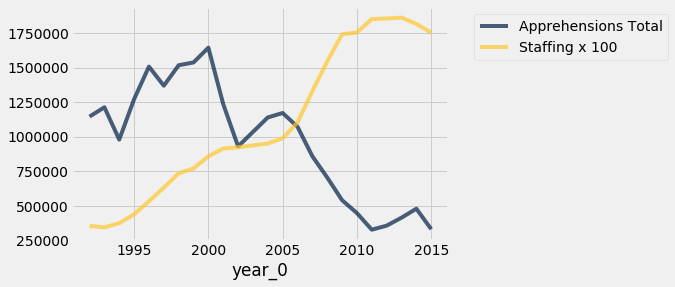

In [48]:
apprehensions_and_wall_and_staffing.with_column(
    "Staffing x 100",
    apprehensions_and_wall_and_staffing.column(4) * 100).drop(1,2,4).plot("year_0")

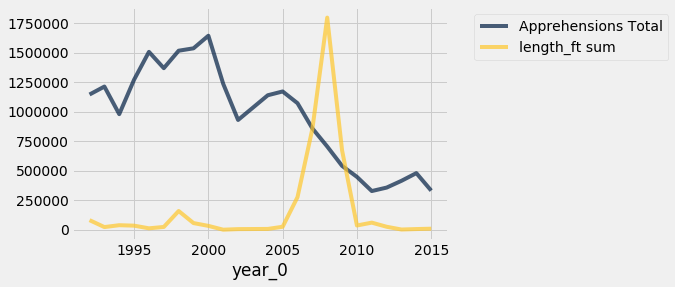

In [49]:
apprehensions_and_wall_and_staffing.select(0,1,3).move_to_start(
    "Apprehensions Total").plot("year_0")

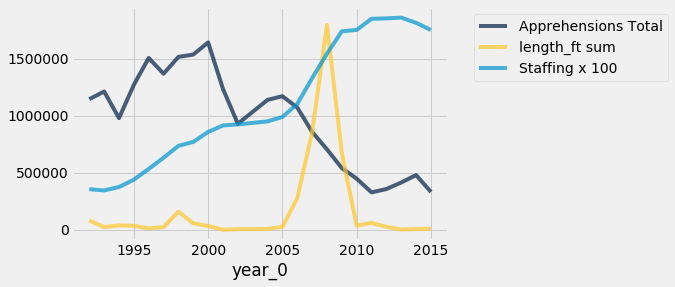

In [50]:
apprehensions_and_wall_and_staffing.with_column(
    "Staffing x 100",
    apprehensions_and_wall_and_staffing.column(4) * 100).select(
    0,1,3,5).move_to_start("Apprehensions Total").plot("year_0")

We joined with the wall data, information about border patrol staffing (total number of Southwest Border Patrol staff) along with the number of apprehensions at the Southwest border of the United States (U.S - Mexico border) per Fiscal Year. We can see that over time, total apprehensions has decreased while staffing has increased. By visualizing the ratio of total apprehensions to staffing, we can see a general negative trend (seen in line plots above and scatter plot below in Part 7). 

Furthermore, we also see (in the very last line plot) a large influx of wall being built in 2008 as well as a significant decrease in total apprehensions during 2008 (albeit the decrease in apprehensions decreased steadily between 2005 to 2010). The final line plot shows the total number of apprehensions from 1992 to 2015 against both length of wall build (in ft.) and number of Border Patrol staffing (multiplied by 100 to normalize to scale). Around the year 2001 (September 11th) border staffing and security was increase and apprehensions decreased. The largest decline in apprehensions occured between 2005 and around 2012 where we also see a significant increase in Border Patrol staffing and wall being built. These graphics coincide with the numbers seen in the apprehensions_and_wall_and_staffing joined and grouped table we created.

#### Hypothesis related to the data and the corresponding null hypothesis.



Hypothesis: There is indeed a relationship between Border Patrol staffing and the number of Apprehensions at the U.S. - Mexican border. 

We chose to analyze the relationship between Border Patrol (BP) staffing and apprehensions per year instead of the amount of wall being built and apprehensions based on the visualizations above showing clearer trends between staffing and apprehensions since 1992. This was further evidenced by the scatter plot between each variable produced below and their corresponding r values where the r value for apprehensions and BP staffing shows a strong negative correlation (-0.86) and the r value for apprehensions and the wall shows almost no relationship (-0.18). By testing the nature of the relationship between BP staffing and apprehensions, we may be able to see if an increase in border security by way of Border Patrol staffing actually deters people from crossing the U.S. Mexico border illegally. 

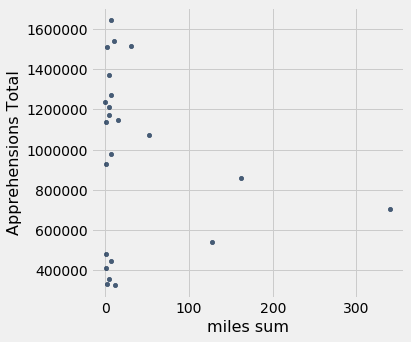

In [51]:
just_app_and_wall = apprehensions_and_wall_and_staffing.select("miles sum", "Apprehensions Total")

just_app_and_wall.scatter("miles sum", "Apprehensions Total")

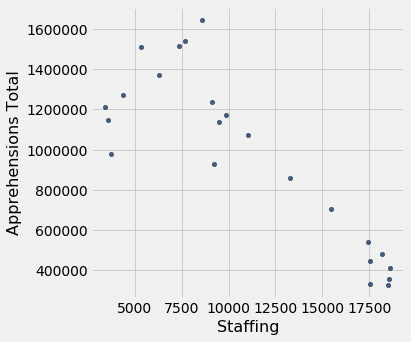

In [52]:
just_app_and_staffing = apprehensions_and_wall_and_staffing.select('Staffing', 'Apprehensions Total')
just_app_and_staffing.scatter(0, 1)

##### Null hypothesis: The slope of the true line between apprehensions and border patrol staffing is 0; There is no relationship.
##### Alternative hypothesis: The slope of the true line is not 0.

#### Statistical test for the hypothesis and short conclusion.



In [53]:
def standard_units(arr):
    standard_units = (arr - np.mean(arr)) / np.std(arr)
    return standard_units 

def correlation(tbl):
    first_column_su = standard_units(tbl.column(0))
    second_column_su = standard_units(tbl.column(1))
    r = np.mean(first_column_su*second_column_su)
    return r

def fit_line(tbl):
    r = correlation(tbl)
    slope = r * ((np.std(tbl.column(1)))/(np.std(tbl.column(0))))
    intercept = np.mean(tbl.column(1)) - (slope * np.mean(tbl.column(0)))
    return make_array(slope, intercept)

In [54]:
correlation(just_app_and_staffing) # r value for BP staffing and apprehensions


-0.85869306081751784

In [55]:
correlation(just_app_and_wall) # r value for wall and apprehensions

-0.17740326201878953

We create a histogram of slopes of 1000 samples of the data.

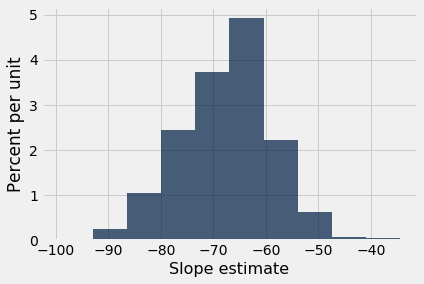

In [56]:
resample_slopes = make_array()
for i in np.arange(1000):
    sample = just_app_and_staffing.sample(23)
    resample_line = fit_line(sample)
    resample_slope = resample_line.item(0)
    resample_slopes = np.append(resample_slope, resample_slopes)

Table().with_column("Slope estimate", resample_slopes).hist() # DO NOT CHANGE THIS LINE

Now we compute a 95% confidence interval.

In [57]:
lower_end = percentile(2.5, resample_slopes)
upper_end = percentile(97.5, resample_slopes)
print("95% confidence interval for slope: [{:g}, {:g}]".format(lower_end, upper_end))

95% confidence interval for slope: [-84.9151, -51.5885]


Thus, because 0 is not within the 95% confidence interval, we can reject the null hypothesis. We can conclude that there is not no relationship.

#### Prediction problem related to the data.

Predict apprehensions in a year given staffing number of 12000 using linear regression. That is, using the best fit line between the two variables that we generated above, generate the corresponding y values (apprehensions) given the x values (BP staffing) that fall on our best fit line. We will then calculate the residual errors and root mean squared error (RMSE) to assess our model's performance quantitatively.

#### Application of prediction technique to the problem.

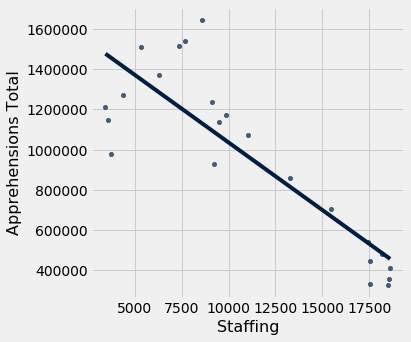

In [58]:
apprehensions_and_wall_and_staffing.scatter('Staffing', 'Apprehensions Total', fit_line=True)

In [59]:
# Find the predicted apprension total given a staffing number using the regression line
m_and_b = fit_line(just_app_and_staffing) # returns slope and intercept
#Using y = mx+b
staffing_12000 = np.round(m_and_b.item(0)*12000 + m_and_b.item(1))
staffing_12000

901394.0

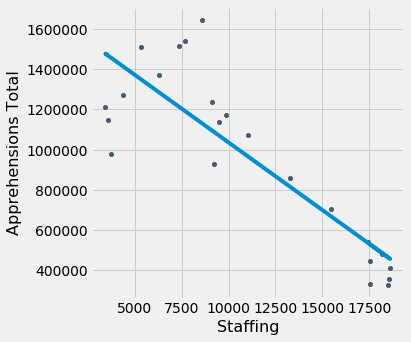

In [60]:
just_app_and_staffing
predicted_y = m_and_b.item(0) * just_app_and_staffing.column(0) + m_and_b.item(1)
apprehensions_and_wall_and_staffing.scatter('Staffing', 'Apprehensions Total')
plots.plot(just_app_and_staffing.column(0), predicted_y)

We use ordinary least squares linear regression as our method of prediction since the two features (apprehensions and BP staffing) seem to have a strong negative correlation (r = -.86) and since we were able to reject the null hypothesis by way of bootstrap statistical testing that the slope of the true line between apprehensions and staffing is 0, which indicates that there is not not a relationship between the two variables. 

#### Quantitative evaluation of prediction technique and short conclusion.

Looking at the chart, we can see that ~90000 seems to be a resonable number of apprehensions given a staffing of 1200 since it falls on the line of best fit. But when we investigate quantitatively, we see that linear regression may not have been the best method for predication and that there wasn't a linear relationship...

In [61]:
residuals = just_app_and_staffing.column(1) - predicted_y
residuals

array([-323020.26542503, -263163.4748514 , -476597.76803887,
       -141256.6127028 ,  157843.41349468,   85485.50950095,
        303443.44844039,  347203.70150168,  512584.08022824,
        142705.09594673, -157024.81155574,   70380.98949688,
        128353.14831808,  105563.32809726,   44355.89882455,
         34789.7836855 ,    2694.30379581,  -81909.86199564,
       -136847.57052711, -104865.00857166,  -42975.34539406,
         -8560.98763729, -199180.99463116])

In [62]:
rmse = np.sqrt(np.mean(residuals ** 2))
rmse

217405.01715345035

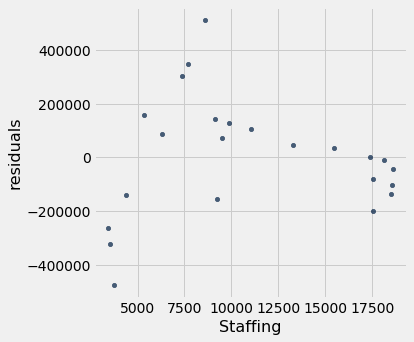

In [63]:
just_app_and_staffing.select(0).with_column("residuals", residuals).scatter(0)

In [64]:
print("Staffing mean: ", np.std(just_app_and_staffing.select(1)), "Staffing std. deviation: ", 
      np.mean(just_app_and_staffing.select(1)))


Staffing mean:  Apprehensions Total
424213 Staffing std. deviation:  Apprehensions Total
964870


/Users/ryanschaub/anaconda3/lib/python3.5/site-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


We were surprised to find that our rmse was as large as 217405, so, upon further investigation, after plotting the residual errors against the predictor variable, BP Staffing, to check whether linear regression was an appropriate prediction method, we see that there is not a non-associated "blob" of points present and, instead, there appears to be a pattern where the BP Staffing data seems to be higher when the residual erros approach zero. This indicates that linear regression was not the best method for prediction. Our mistake was not testing for whether linear regression was the appropriate prediction method before carrying out the prediction and assuming that a high r value of -.86 was enough grounds to justify linear regression as our prediction method.